# Theory

In [67]:
import skvideo.datasets
import skvideo

skvideo.setFFmpegPath("C:/ffmpeg-20200831-4a11a6f-win64-static/bin")

import skvideo.io

videodata = skvideo.io.vread(skvideo.datasets.bigbuckbunny())
print(videodata.shape)

AssertionError: Cannot find installation of real FFmpeg (which comes with ffprobe).

## Video Data

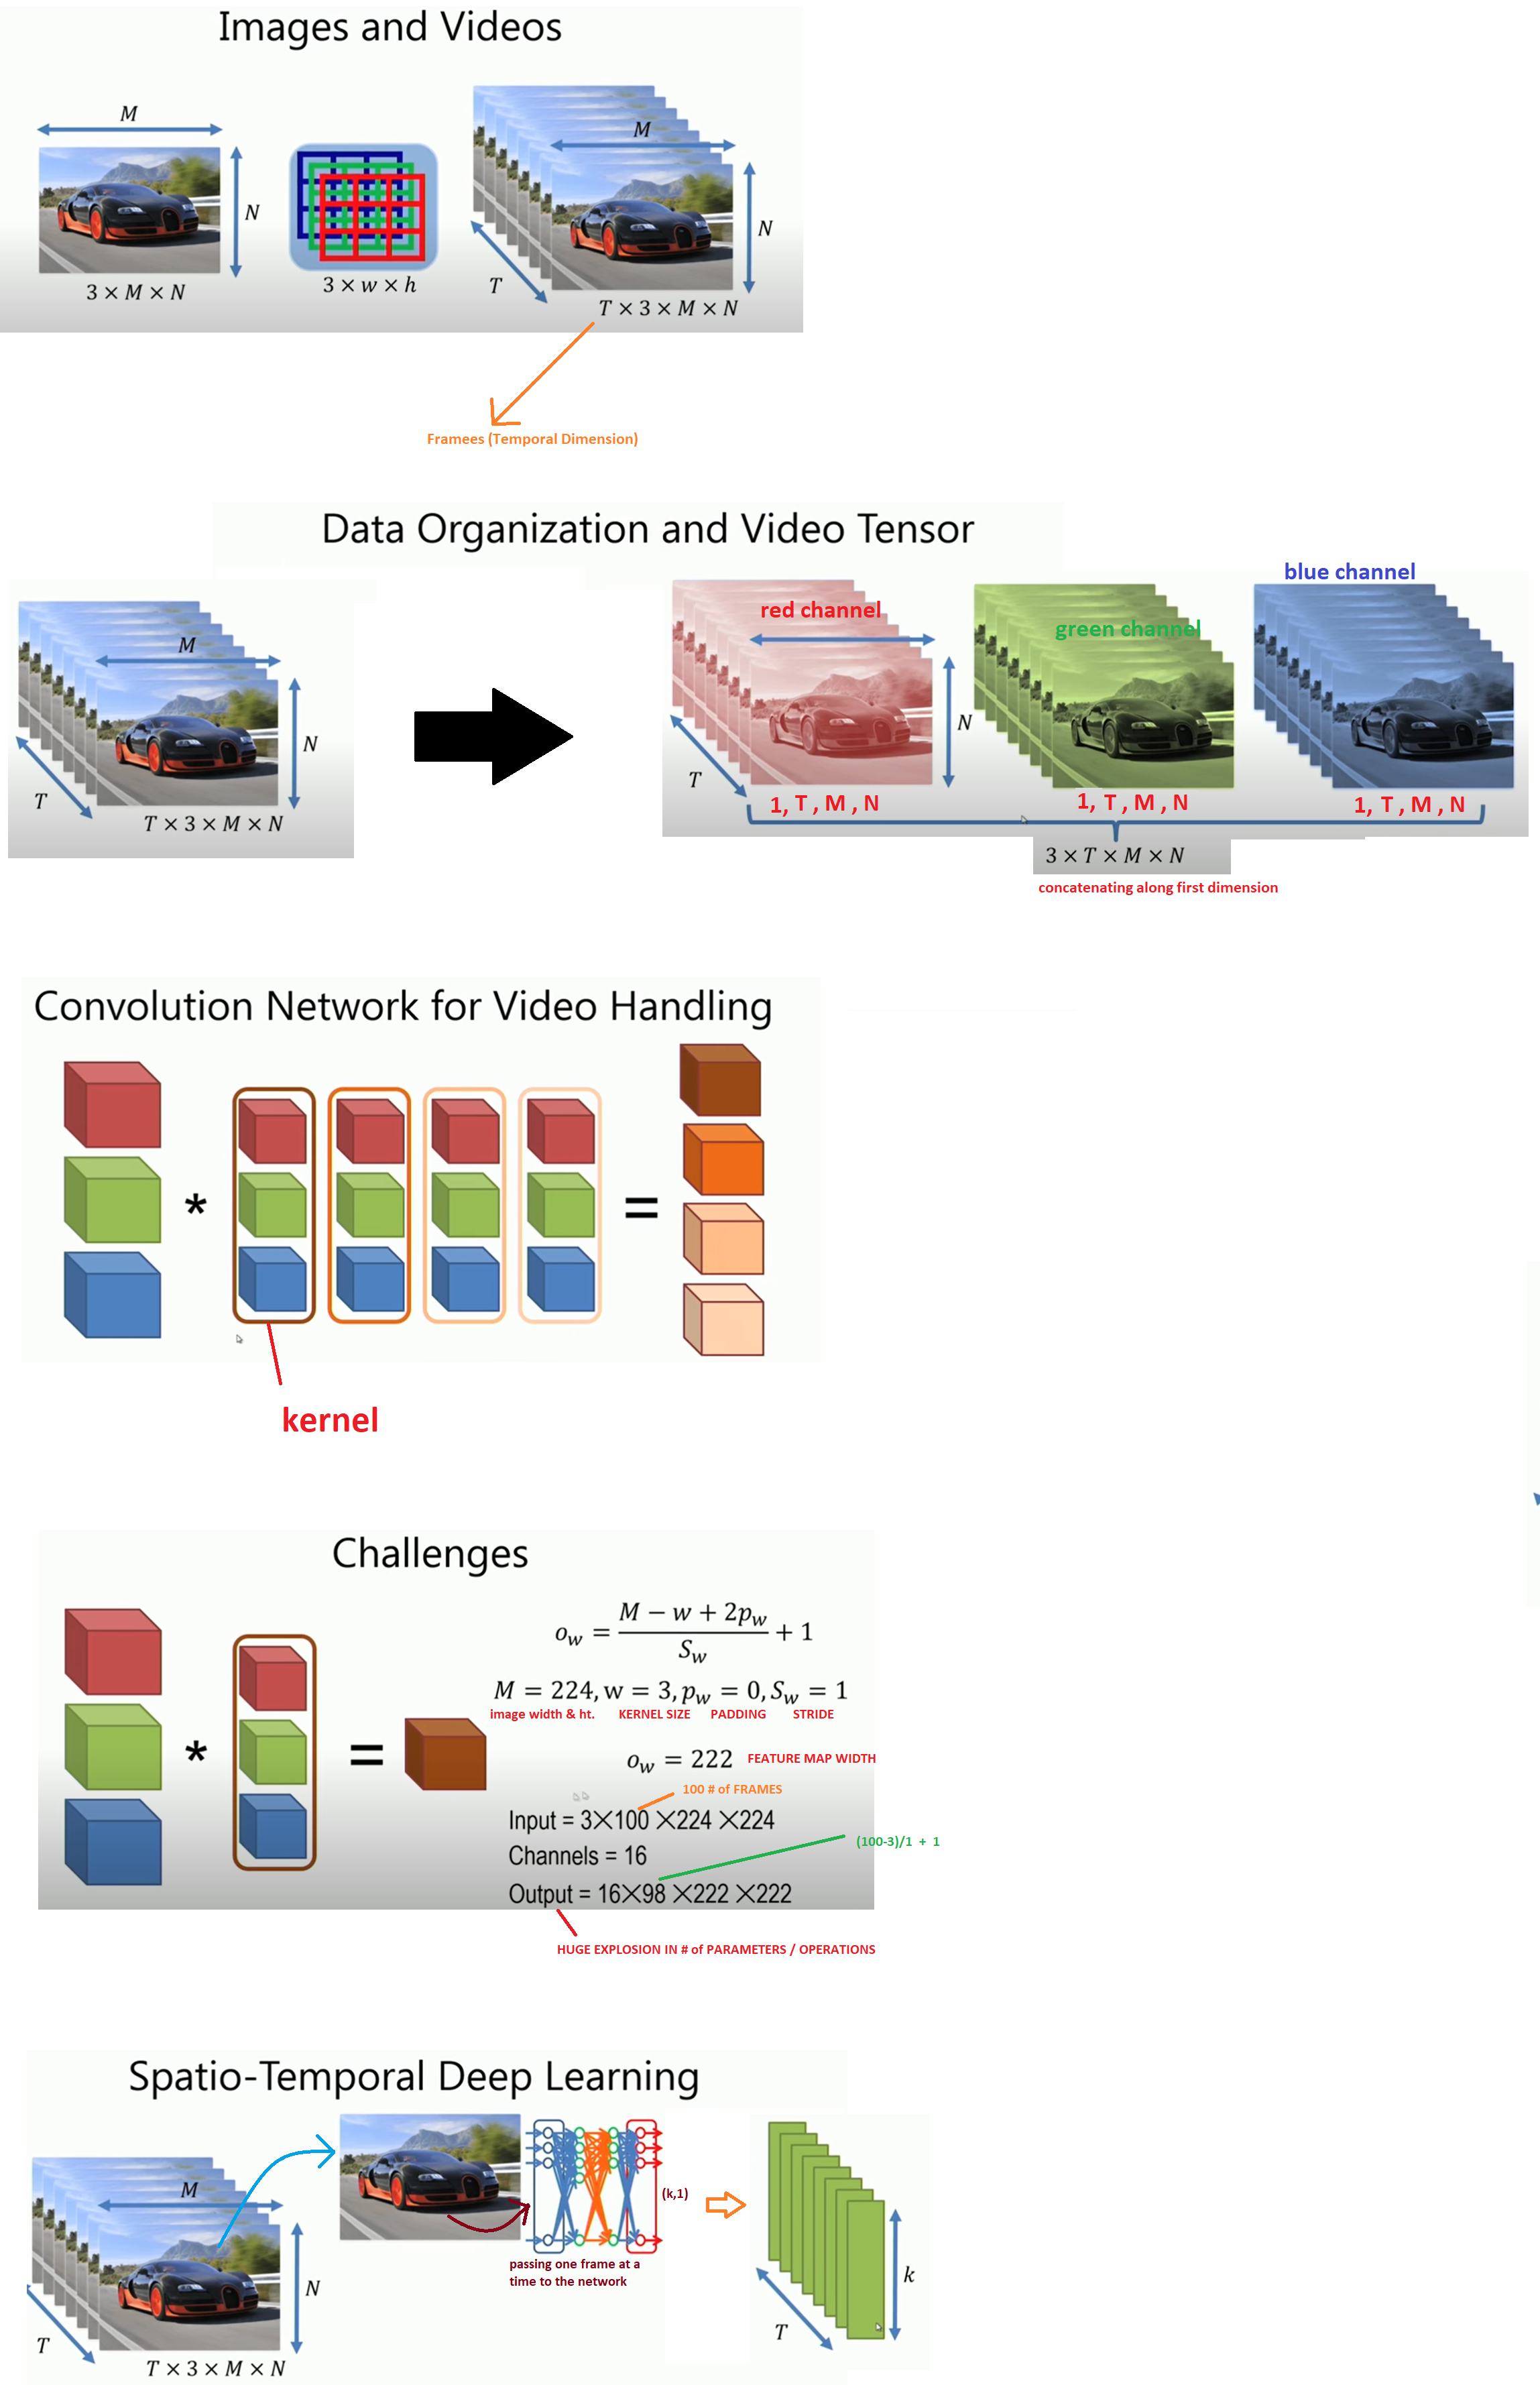

## Recurrent Networks

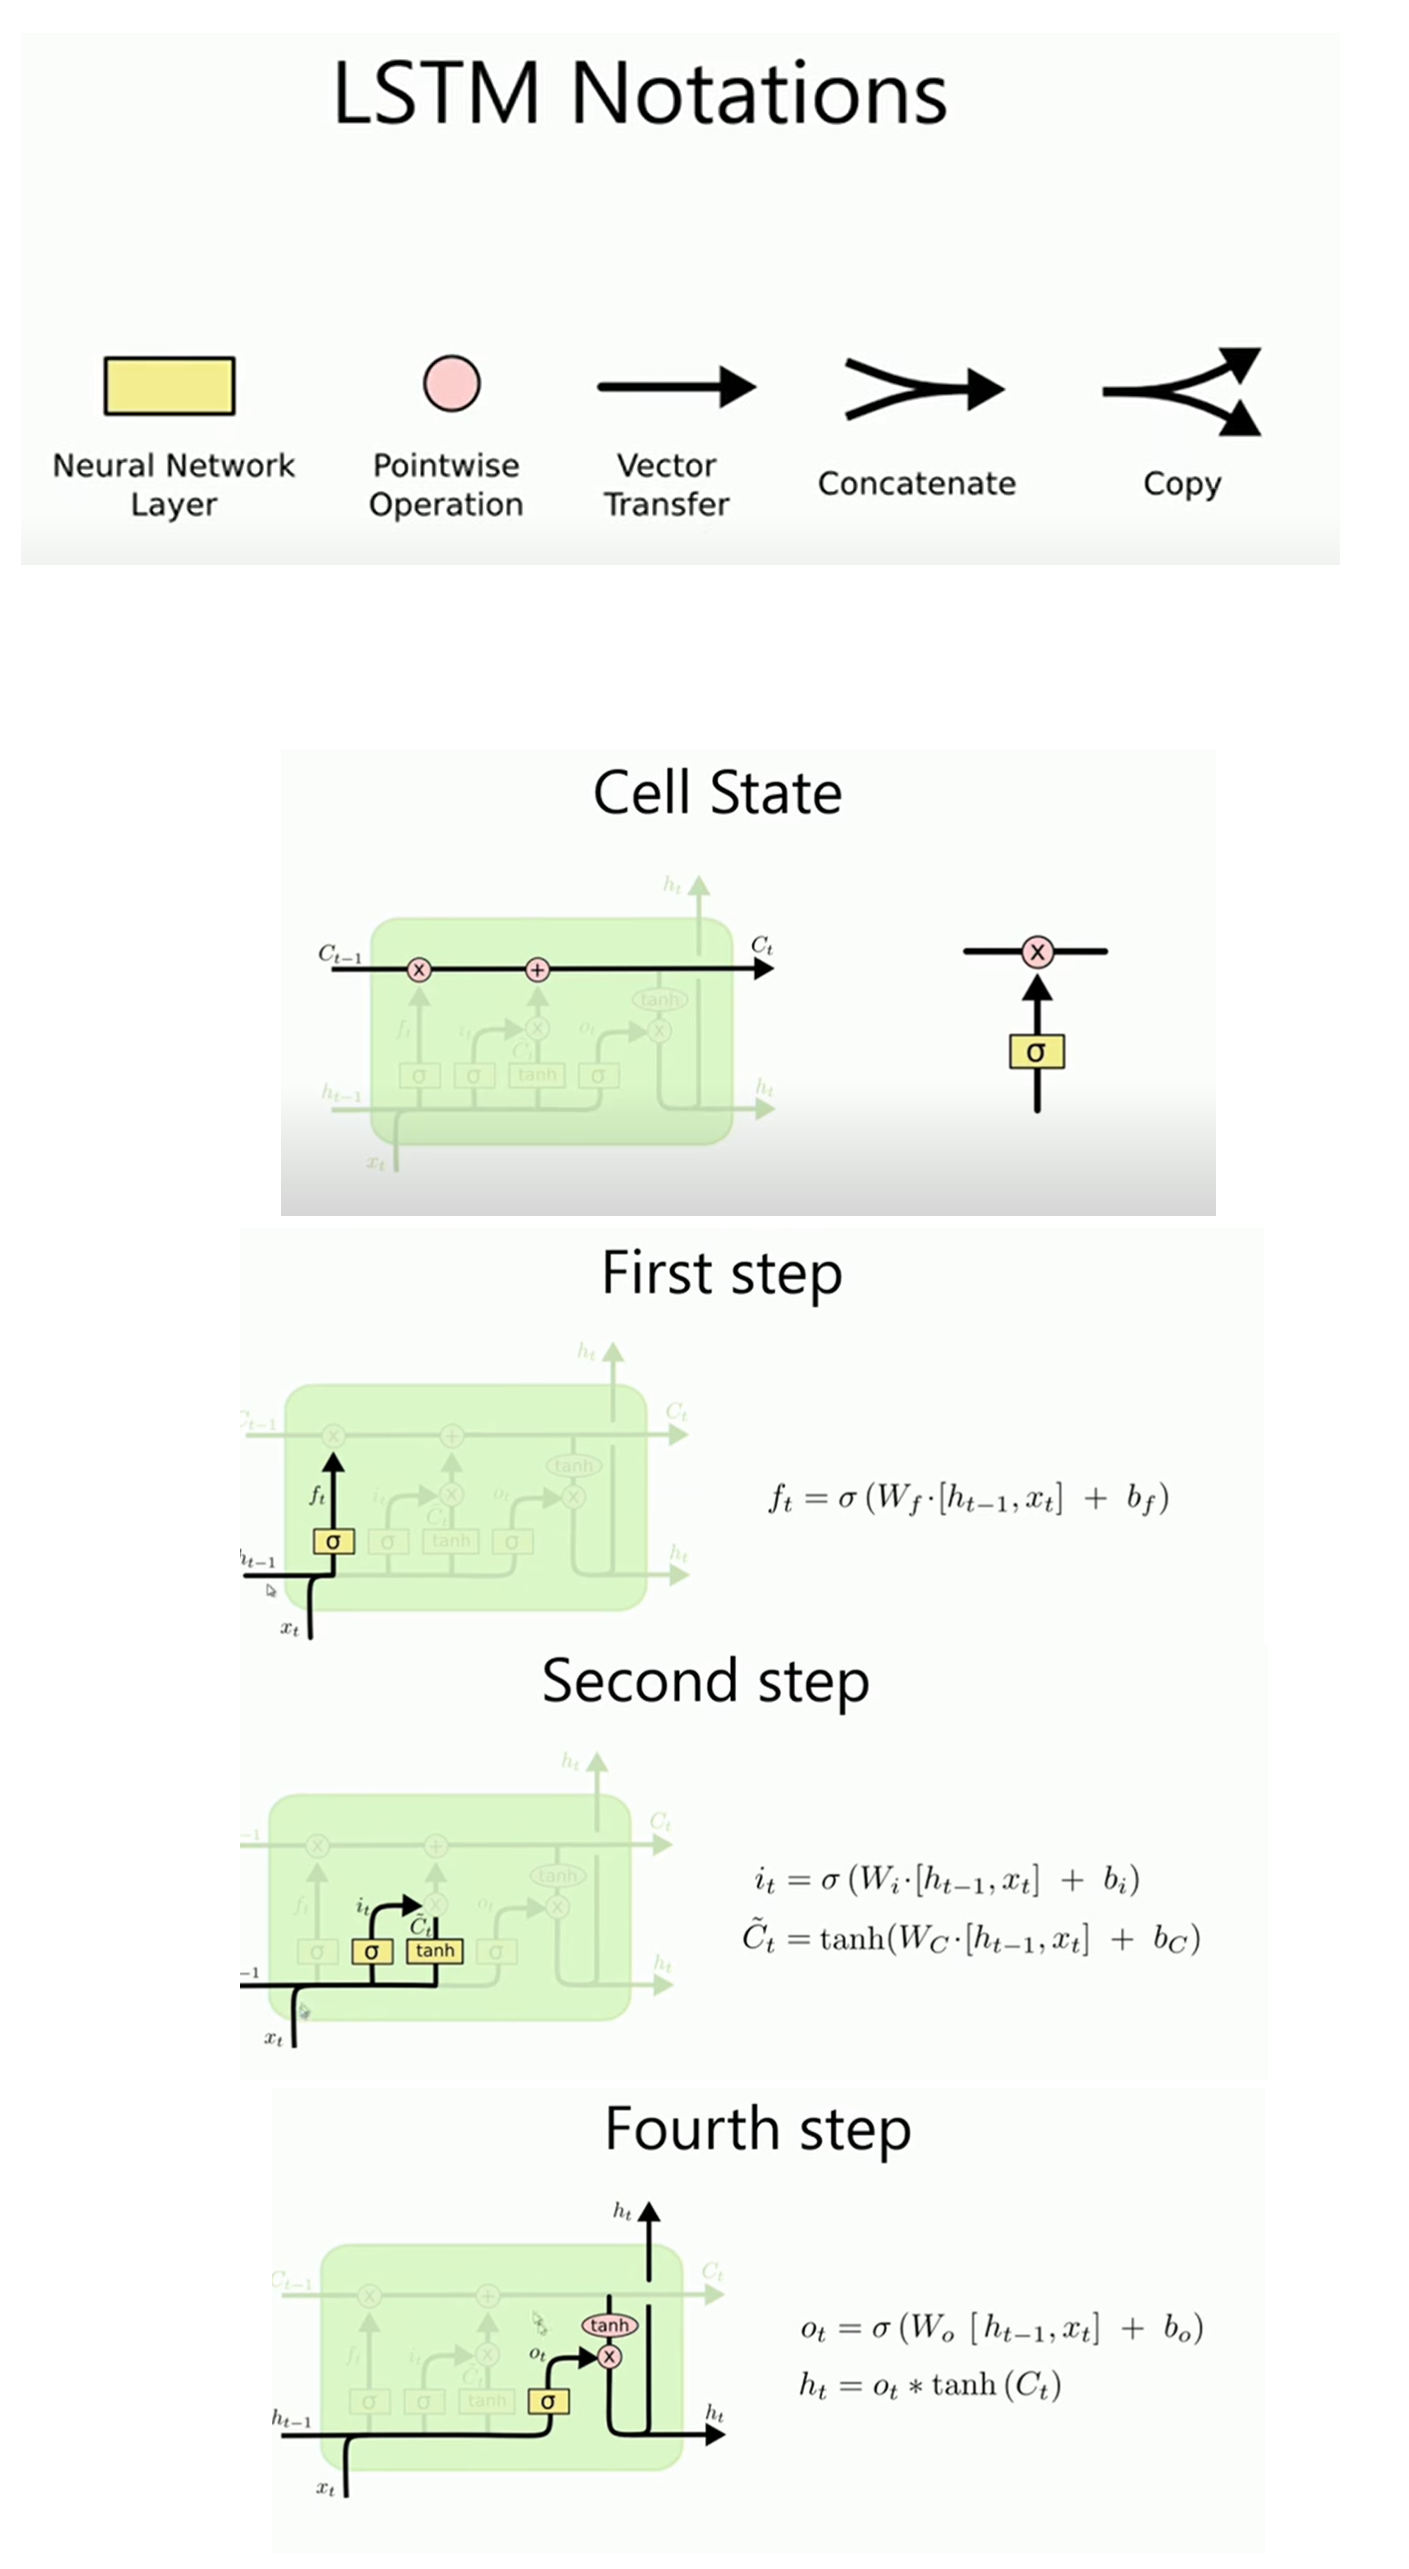

# Activity recognition using 3D-CNN

## Preprocessing

In [ ]:
import torchvision
V,A,I = torchvision.io.read_video('a.avi')

### Frame extraction and dataset preparation for training CNN

 Dataset: [UCF101](https://www.crcv.ucf.edu/research/data-sets/ucf101/)

Download the dataset and unzip in the current directory

In [25]:
import os
import shutil
import numpy as np
import pickle

### Extract frames from all videos of the dataset



Install ffmpeg if not already installed

In [31]:
srcPath = 'UCF-101/'
classes = os.listdir(srcPath)
for c in classes:
    files = os.listdir(srcPath+c)
    for f in files:
        filename = srcPath+c+'/'+f
        dstPath = 'frames/'+c+'/'+f[:-4]
        if not os.path.exists(dstPath):
            os.makedirs(dstPath)
        os.system('ffmpeg -i {0} {1}/frame_%04d.jpg'.format(filename, dstPath))          

### Truncating the dataset to 5 classes

In [39]:
path = 'frames'
classes = os.listdir(path)
classes.sort()
classes_5 = classes[:5]
print(classes_5)

['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']


In [33]:
# The dataset has videos of 25 individuals performing each activity
# Choosing 20 for training; 5 for testing
trainList = []
testList = []
for c in classes_5:
    trainIndvList = []
    vidList = os.listdir(path+'/'+c)
    vidList.sort()   
    for item in vidList:
        # video name eg: v_ApplyEyeMakeup_g01_c01 => g01 
        user = item.split('_')[2]
        if (user not in trainIndvList):   
            if len(trainIndvList)<20:              
                trainIndvList.append(user) # Keeping track of train-test list
                trainList.append(item) # Adding the video name to train list
            else:
                testList.append(item) # Adding the video name to test list
        else:
            trainList.append(item)     

In [34]:
with open('trainList_5class.pckl','wb') as f:
    pickle.dump(trainList,f)
with open('testList_5class.pckl','wb') as f:
    pickle.dump(testList,f)

### Deleting videos from the train and test list with more than 1 frame drop

In [56]:
# Filtering train set
count = 1
delList = []
for item in trainList:
    print(str(count)+'/'+str(len(trainList)))
    cl = item.split('_')[1]
    srcPath = 'frames/'+cl+'/'+item    
    fNames = os.listdir(srcPath)
    fNums = [int(x[:-4].split('_')[-1]) for x in fNames]
    fNums.sort()    
    if fNums[-1]-len(fNames)>1:
        delList.append('frames/'+cl+'/'+item)
    count += 1    
for item in delList:
    shutil.rmtree(item)

1/511
2/511
3/511
4/511
5/511
6/511
7/511
8/511
9/511
10/511
11/511
12/511
13/511
14/511
15/511
16/511
17/511
18/511
19/511
20/511
21/511
22/511
23/511
24/511
25/511
26/511
27/511
28/511
29/511
30/511
31/511
32/511
33/511
34/511
35/511
36/511
37/511
38/511
39/511
40/511
41/511
42/511
43/511
44/511
45/511
46/511
47/511
48/511
49/511
50/511
51/511
52/511
53/511
54/511
55/511
56/511
57/511
58/511
59/511
60/511
61/511
62/511
63/511
64/511
65/511
66/511
67/511
68/511
69/511
70/511
71/511
72/511
73/511
74/511
75/511
76/511
77/511
78/511
79/511
80/511
81/511
82/511
83/511
84/511
85/511
86/511
87/511
88/511
89/511
90/511
91/511
92/511
93/511
94/511
95/511
96/511
97/511
98/511
99/511
100/511
101/511
102/511
103/511
104/511
105/511
106/511
107/511
108/511
109/511
110/511
111/511
112/511
113/511
114/511
115/511
116/511
117/511
118/511
119/511
120/511
121/511
122/511
123/511
124/511
125/511
126/511
127/511
128/511
129/511
130/511
131/511
132/511
133/511
134/511
135/511
136/511
137/511
138/511
139/

In [58]:
# Filtering test set
count = 1
testDelList = []
for item in testList:
    print(str(count)+'/'+str(len(testList)))
    cl = item.split('_')[1]
    srcPath = 'frames/'+cl+'/'+item    
    fNames = os.listdir(srcPath)
    fNums = [int(x[:-4].split('_')[-1]) for x in fNames]
    fNums.sort()
    if fNums[-1]-len(fNames)>1: 
        testDelList.append('frames/'+cl+'/'+item)       
    count += 1   
for item in testDelList:
    shutil.rmtree(item)

1/133
2/133
3/133
4/133
5/133
6/133
7/133
8/133
9/133
10/133
11/133
12/133
13/133
14/133
15/133
16/133
17/133
18/133
19/133
20/133
21/133
22/133
23/133
24/133
25/133
26/133
27/133
28/133
29/133
30/133
31/133
32/133
33/133
34/133
35/133
36/133
37/133
38/133
39/133
40/133
41/133
42/133
43/133
44/133
45/133
46/133
47/133
48/133
49/133
50/133
51/133
52/133
53/133
54/133
55/133
56/133
57/133
58/133
59/133
60/133
61/133
62/133
63/133
64/133
65/133
66/133
67/133
68/133
69/133
70/133
71/133
72/133
73/133
74/133
75/133
76/133
77/133
78/133
79/133
80/133
81/133
82/133
83/133
84/133
85/133
86/133
87/133
88/133
89/133
90/133
91/133
92/133
93/133
94/133
95/133
96/133
97/133
98/133
99/133
100/133
101/133
102/133
103/133
104/133
105/133
106/133
107/133
108/133
109/133
110/133
111/133
112/133
113/133
114/133
115/133
116/133
117/133
118/133
119/133
120/133
121/133
122/133
123/133
124/133
125/133
126/133
127/133
128/133
129/133
130/133
131/133
132/133
133/133


In [59]:
for item in classes_5:
    print(item)
    srcPath = path+'/'+item
    files = os.listdir(srcPath)
    trainNum = np.floor(len(files)*0.8)
    testNum = len(files)-trainNum
    for idx in range(int(trainNum)):
        trainDst = 'train_5class/'+item+'/'+files[idx] 
        shutil.copytree(srcPath+'/'+files[idx],trainDst)         
        
    for idx2 in range(int(trainNum),int(trainNum+testNum)):
        testDst = 'test_5class/'+item+'/'+files[idx2]        
        shutil.copytree(srcPath+'/'+files[idx2],testDst)

ApplyEyeMakeup
ApplyLipstick
Archery
BabyCrawling
BalanceBeam


### Saving frames of videos as pytorch tensors

In [60]:
import os
import torch
import pickle
from PIL import Image
from torchvision import transforms

In [61]:
# Load train-test list
with open('trainList_5class.pckl','rb') as f:
    trainList = pickle.load(f)
with open('testList_5class.pckl','rb') as f:
    testList = pickle.load(f)

In [62]:
# Printing classes
classes = []
for item in trainList:
    c = item.split('_')[1]
    if c not in classes:
        classes.append(c)
print(classes)

['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']


In [63]:
# PIL image to pytorch tensor transformation
data_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),            
        transforms.ToTensor()])

In [64]:
framePath = 'frames/' # Directory containing the frames
# Pack frames of to single tensor per video
for item in trainList:
    cName = item.split('_')[1]
    srcPath = framePath+cName+'/'+item    
    fNames = os.listdir(srcPath)
    fTemplate = fNames[0].split('_')
    fCount = len(fNames)
    for fNum in range(fCount):
        fileName = fTemplate[0]+'_'+fTemplate[1]+'_'+fTemplate[2]+'_'+fTemplate[3]+'_'+str(fNum+1)+'.jpg'
        if os.path.exists(srcPath+'/'+fileName):
            # Load image
            img = Image.open(srcPath+'/'+fileName) 
            # Transform to tensor
            imgTensor = data_transforms(img).unsqueeze(1)                              
            # Stack tensors per video. trainTensor dimension: 3xframe_countx224x224
            if fNum == 0:
                trainTensor = imgTensor                
            else:
                trainTensor = torch.cat((trainTensor,imgTensor),1)
        else:
            print(fileName+ ' missing!')  
        
    # Directory structure: ucf101_vidTensors --> train-> class name -> tensors
    tensorSavePath = 'ucf101_vidTensors/train/'+cName
    if not os.path.exists(tensorSavePath):
        os.makedirs(tensorSavePath)
    torch.save(trainTensor,os.path.join(tensorSavePath,item+'.pt'))   
    

IndexError: list index out of range

In [ ]:
# Pack frames of to single tensor per video
for item in testList:
    cName = item.split('_')[1]
    srcPath = framePath+cName+'/'+item    
    fNames = os.listdir(srcPath)
    fTemplate = fNames[0].split('_')
    fCount = len(fNames)
    for fNum in range(fCount):
        fileName = fTemplate[0]+'_'+fTemplate[1]+'_'+fTemplate[2]+'_'+fTemplate[3]+'_'+str(fNum+1)+'.jpg'
        if os.path.exists(srcPath+'/'+fileName):
            # Load image
            img = Image.open(srcPath+'/'+fileName)
             # Transform to tensor
            imgTensor = data_transforms(img).unsqueeze(1)             
            # Stack tensors per video. testTensor dimension: 3xframe_countx224x224
            if fNum == 0:
                testTensor = imgTensor                
            else:
                testTensor = torch.cat((testTensor,imgTensor),1)
        else:
            print(fileName+ ' missing!')       
        
    # Directory structure: ucf101_vidTensors --> train-> class name -> tensors
    tensorSavePath = 'ucf101_vidTensors/test/'+cName
    if not os.path.exists(tensorSavePath):
        os.makedirs(tensorSavePath)
    torch.save(testTensor,os.path.join(tensorSavePath,item+'.pt'))   
   

## Architecture + Training

### Imports

In [20]:
%matplotlib inline
import os
import copy
import time
import torch
import numpy as np
import torch.nn as nn
from random import shuffle
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms,datasets, models

print(torch.__version__) # This code has been updated for PyTorch 1.0.0

1.5.0


### Create train  and test list

In [23]:
# Directory containing tensor of frames for each video
trainPath = 'ucf101_vidTensors/train/'
testPath = 'ucf101_vidTensors/test/'

In [24]:
# Preparing train list
classes = os.listdir(trainPath)
classes.sort()
labels = np.arange(5)
trainShuffList = []
labelShuffList = []
for c in range(5):
    files = os.listdir(trainPath+classes[c])
    for f in files:
        trainShuffList.append(classes[c]+'/'+f)  
        labelShuffList.append(float(labels[c]))
trainList = list(zip(trainShuffList, labelShuffList))
shuffle(trainList)
trainShuffList, labelShuffList = zip(*trainList)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'ucf101_vidTensors/train/'

In [ ]:
# Preparing test list
testList = []
testLabelList = []
for c in range(5):
    files = os.listdir(testPath+classes[c])
    for f in files:
        testList.append(classes[c]+'/'+f)  
        testLabelList.append(float(labels[c]))

### Define network architecture

In [ ]:
class net_3DCNN(nn.Module):
    def __init__(self):
        super(net_3DCNN, self).__init__()   
        self.conv1 = nn.Conv3d(3, 16, kernel_size=5)   
        self.pool1 = nn.MaxPool3d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv3d(16, 32, kernel_size=3) 
        self.pool2 = nn.MaxPool3d(kernel_size=2,stride=2)
        self.conv3 = nn.Conv3d(32, 32, kernel_size=3) 
        self.pool3 = nn.AvgPool3d(kernel_size=4)   
        self.fc    = nn.Linear(32*13*13,5)   
    
    def forward(self, x):        
        x = F.relu(self.conv1(x),inplace=True)
        x = self.pool1(x)
        x = F.relu(self.conv2(x),inplace=True)
        x = self.pool2(x)
        x = F.relu(self.conv3(x),inplace=True)
        x = self.pool3(x)        
        x = self.fc(x.view(x.size(0),-1))
        return x

### Define train routine

In [ ]:
def train(net, inputs, labels, optimizer, criterion):
    net.train()
    inputs, labels = inputs.float().to(device), labels.to(device)    
    outputs = net(inputs)
#     print(outputs.size())
    _, predicted = torch.max(outputs.data, 1)     
    # Initialize gradients to zero
    optimizer.zero_grad() 
    # Compute loss/error
    loss = criterion(F.log_softmax(outputs,dim=1), labels)
    # Backpropagate loss and compute gradients
    loss.backward()
    # Update the network parameters
    optimizer.step()
    correct = (predicted == labels.data).sum()
    return net, loss.item(), correct    

### Define test routine

In [ ]:
def test(net, inputs, labels, criterion):
    net.eval()
    inputs, labels = inputs.to(device), labels.to(device)
    with torch.no_grad:
        outputs = net(inputs)
#     print(outputs.size())
    _, predicted = torch.max(outputs.data, 1)  
    # Compute loss/error
    loss = criterion(F.log_softmax(outputs,dim=1), labels)       
    correct = (predicted == labels.data).sum()
    return loss.item(), correct
    

### Initialize network

In [ ]:
net = net_3DCNN()
print(net)

In [ ]:
# Check availability of GPU

use_gpu = torch.cuda.is_available()
# use_gpu = False # Uncomment in case of GPU memory error
if use_gpu:
    print('GPU is available!')
    device = "cuda"
else:
    print('GPU is not available!')
    device = "cpu"
    
net = net.to(device)

### Define loss function and optimizer

In [ ]:
criterion = nn.NLLLoss() # Negative Log-likelihood
optimizer = optim.Adam(net.parameters(), lr=1e-4) # Adam

### Train the network

In [ ]:
epochs = 10
bSize = 32
L = 32 # Depth/ no. of frames per video
bCount = len(trainShuffList)//bSize
lastBatch = len(trainShuffList)%bSize

test_bCount = len(testList)//bSize
test_lastBatch = len(testList)%bSize

trainLoss = []
trainAcc = []
testLoss = []
testAcc = []

for epochNum in range(epochs):
    trainList = list(zip(trainShuffList, labelShuffList))
    shuffle(trainList)
    trainShuffList, labelShuffList = zip(*trainList)
    trainRunLoss = 0.0
    testRunLoss = 0.0
    trainRunCorr = 0
    testRunCorr = 0
    epochStart = time.time()
    
    ## Train the network
    # Load data tensors batchwise     
    idx = 0        
    for bNum in range(bCount):
        first = True
        for dNum in range(idx,idx+bSize):
            if first:
                loadData = torch.load(trainPath+trainShuffList[dNum])
                sz = loadData.size(1)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                batchData = torch.index_select(loadData,dim=1,index=idx1).unsqueeze(0)
                batchLabel = torch.Tensor([labelShuffList[dNum]]).long()                          
                first = False                
            else:
                loadData = torch.load(trainPath+trainShuffList[dNum])
                sz = loadData.size(1)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                tempData = torch.index_select(loadData,dim=1,index=idx1).unsqueeze(0)
                batchData = torch.cat((batchData,tempData), dim=0)
                batchLabel = torch.cat((batchLabel,torch.Tensor([labelShuffList[dNum]]).long()),dim=0)            
        
        net, tr_loss, tr_corr = train(net, batchData, batchLabel, optimizer, criterion)
        trainRunLoss += tr_loss
        trainRunCorr += tr_corr
        idx += bSize
    if lastBatch != 0:        
        first = True
        for dNum in range(idx,idx+lastBatch):
            if first:
                loadData = torch.load(trainPath+trainShuffList[dNum])
                sz = loadData.size(1)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                batchData = torch.index_select(loadData,dim=1,index=idx1).unsqueeze(0)
                batchLabel = torch.Tensor([labelShuffList[dNum]]).long()
                first = False                
            else:
                loadData = torch.load(trainPath+trainShuffList[dNum])
                sz = loadData.size(1)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                tempData = torch.index_select(loadData,dim=1,index=idx1).unsqueeze(0)
                batchData = torch.cat((batchData,tempData), dim=0)
                batchLabel = torch.cat((batchLabel,torch.Tensor([labelShuffList[dNum]]).long()),dim=0)          
        net, tr_loss, tr_corr = train(net, batchData, batchLabel, optimizer, criterion)
        trainRunLoss += tr_loss
        trainRunCorr += tr_corr
    avgTrainLoss = trainRunLoss/float(bCount)
    trainLoss.append(avgTrainLoss)
    avgTrainAcc = 100*float(trainRunCorr)/float(len(trainShuffList))
    trainAcc.append(avgTrainAcc)
    
    # Test the network
#     Load data tensors batchwise     
    idx = 0    
    for bNum in range(test_bCount):
        first = True
        for dNum in range(idx,idx+bSize): 
            if first:
                loadData = torch.load(testPath+testList[dNum])
                sz = loadData.size(1)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                batchData = torch.index_select(loadData,dim=1,index=idx1).unsqueeze(0)
                batchLabel = torch.Tensor([testLabelList[dNum]]).long()
                first = False                
            else:
                loadData = torch.load(testPath+testList[dNum])
                sz = loadData.size(1)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                tempData = torch.index_select(loadData,dim=1,index=idx1).unsqueeze(0)
                batchData = torch.cat((batchData,tempData), dim=0)
                batchLabel = torch.cat((batchLabel,torch.Tensor([testLabelList[dNum]]).long()),dim=0)            
        ts_loss, ts_corr = test(net, batchData, batchLabel, criterion)
        testRunLoss += ts_loss
        testRunCorr += ts_corr
        idx += bSize
    if test_lastBatch != 0:        
        first = True
        for dNum in range(idx,idx+test_lastBatch):
            if first:
                loadData = torch.load(testPath+testList[dNum])
                sz = loadData.size(1)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                batchData = torch.index_select(loadData,dim=1,index=idx1).unsqueeze(0)               
                batchLabel = torch.Tensor([testLabelList[dNum]]).long()
                first = False                
            else:
                loadData = torch.load(testPath+testList[dNum])
                sz = loadData.size(1)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                tempData = torch.index_select(loadData,dim=1,index=idx1).unsqueeze(0)
                batchData = torch.cat((batchData,tempData), dim=0)
                batchLabel = torch.cat((batchLabel,torch.Tensor([testLabelList[dNum]]).long()),dim=0)          
        ts_loss, ts_corr = test(net, batchData, batchLabel, criterion)
        testRunLoss += ts_loss
        testRunCorr += tr_corr
    avgTestLoss = testRunLoss/float(test_bCount)
    testLoss.append(avgTestLoss)
    avgTestAcc = 100*float(testRunCorr)/float(len(testList))
    testAcc.append(avgTestAcc)
        
    # Plotting training loss vs Epochs
    fig1 = plt.figure(1)        
    plt.plot(range(epochNum+1),trainLoss,'r-',label='train')  
    plt.plot(range(epochNum+1),testLoss,'g-',label='test') 
    if epochNum==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')   
    # Plotting testing accuracy vs Epochs
    fig2 = plt.figure(2)        
    plt.plot(range(epochNum+1),trainAcc,'r-',label='train')    
    plt.plot(range(epochNum+1),testAcc,'g-',label='test')        
    if epochNum==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
    
    epochEnd = time.time()-epochStart
    print('Iteration: {:.0f} /{:.0f};  Training Loss: {:.6f} ; Training Acc: {:.3f}'\
          .format(epochNum + 1,epochs, avgTrainLoss, avgTrainAcc))
    print('Iteration: {:.0f} /{:.0f};  Testing Loss: {:.6f} ; Testing Acc: {:.3f}'\
          .format(epochNum + 1,epochs, avgTestLoss, avgTestAcc))
    
    print('Time consumed: {:.0f}m {:.0f}s'.format(epochEnd//60,epochEnd%60))
        